In [124]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [125]:
df=pd.read_csv("/kaggle/input/road-accident-casualties-dataset/accident data.csv")

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [127]:
df.shape

(660679, 14)

In [128]:
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [129]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [130]:
df[['Accident_Severity','Light_Conditions','Number_of_Casualties','Number_of_Vehicles','Road_Surface_Conditions','Weather_Conditions']].dropna()

,Accident_Severity,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Weather_Conditions
0,Serious,Darkness - lights lit,1,2,Dry,Fine no high winds
1,Serious,Daylight,1,2,Wet or damp,Raining no high winds
3,Serious,Daylight,1,4,Dry,Fine no high winds
5,Serious,Daylight,2,3,Dry,Fine no high winds
6,Serious,Daylight,1,2,Dry,Fine no high winds
...,...,...,...,...,...,...
660674,Slight,Daylight,2,1,Dry,Fine no high winds
660675,Slight,Darkness - no lighting,1,1,Frost or ice,Fine no high winds
660676,Slight,Daylight,1,3,Frost or ice,Fine no high winds
660677,Serious,Darkness - no lighting,1,2,Wet or damp,Fine no high winds


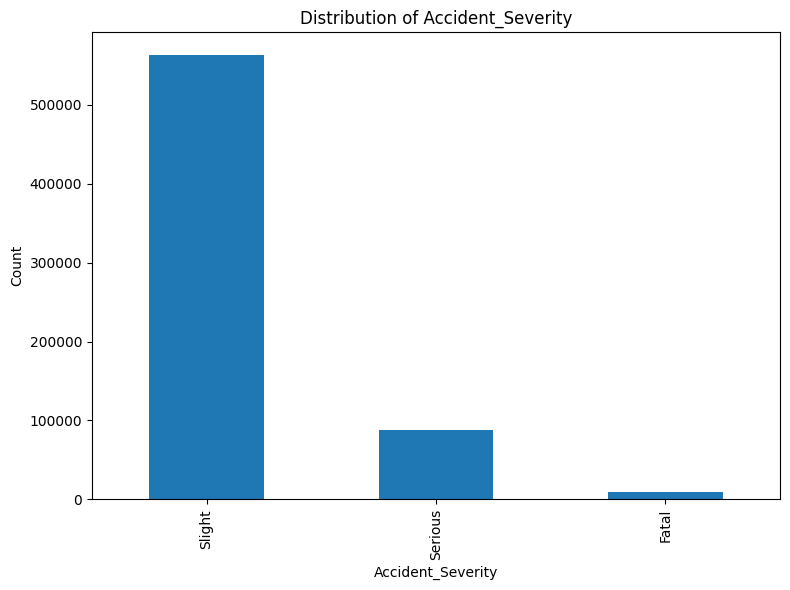

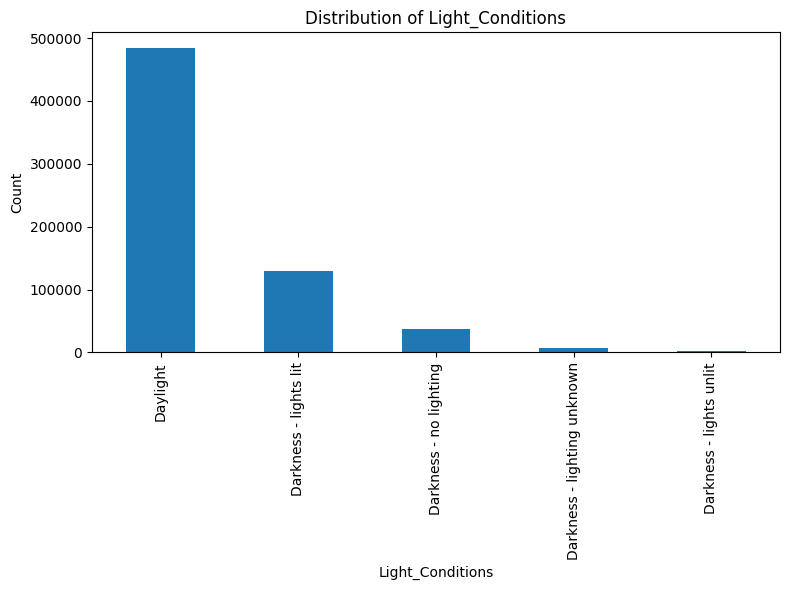

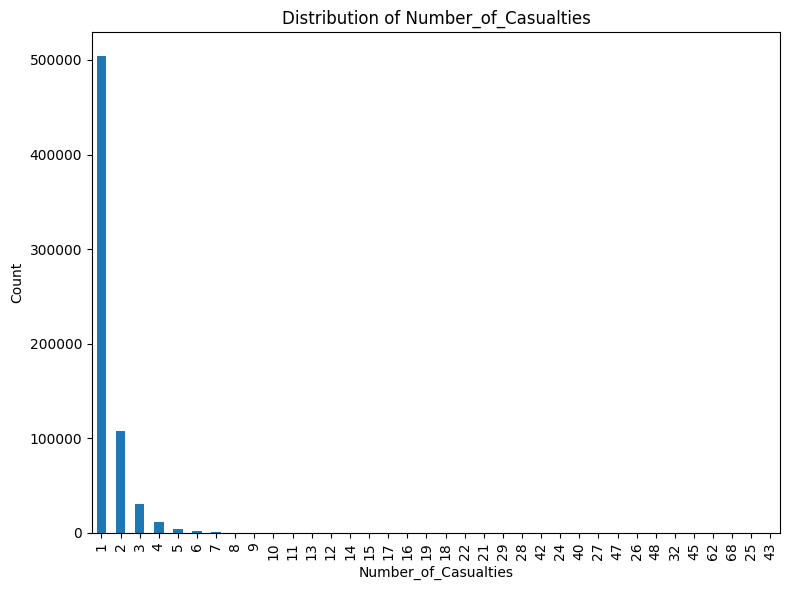

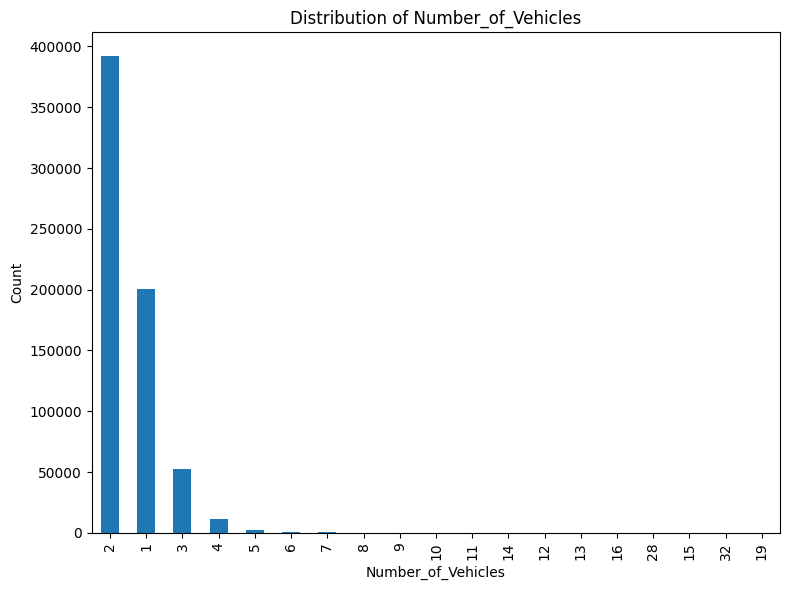

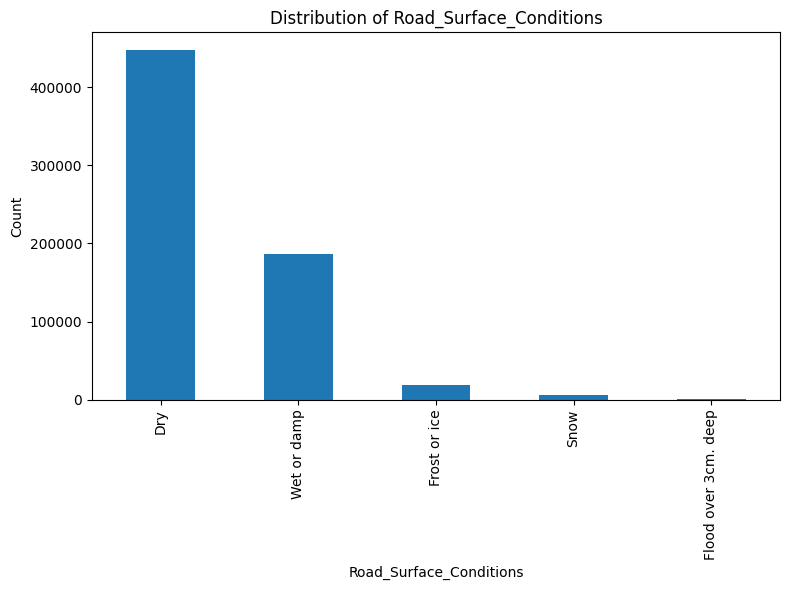

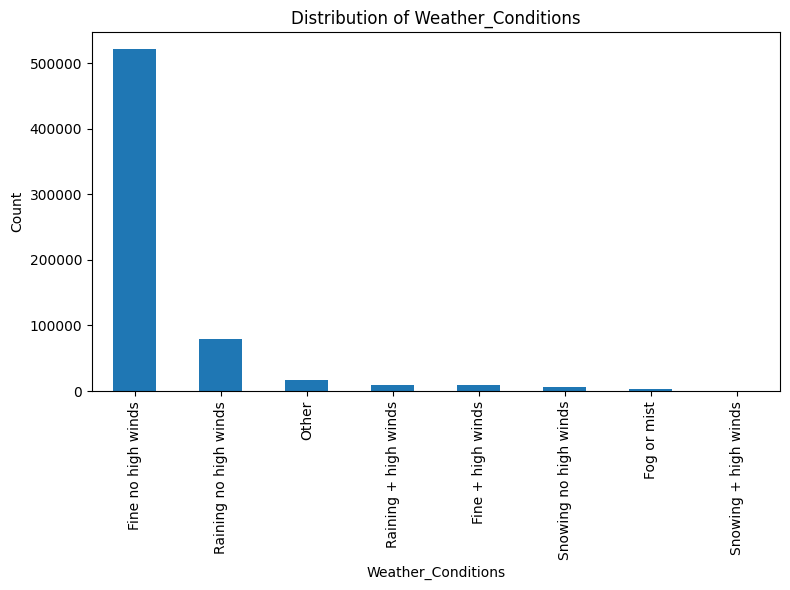

In [131]:
import matplotlib.pyplot as plt

features = ['Accident_Severity', 'Light_Conditions', 'Number_of_Casualties', 
            'Number_of_Vehicles', 'Road_Surface_Conditions', 'Weather_Conditions']

for feature in features:
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 6)  # Adjust size if necessary
    plt.title(f'Distribution of {feature}')
    df[feature].value_counts().plot(kind='bar', ax=ax)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()


In [132]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Encode the target variable 'Accident_Severity'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared:", r2)

# Print the difference between MSE and R-squared
print("Difference between MSE and R-squared:", mse - r2)


Mean Squared Error: 0.15689207628585564
R-squared: 0.02167716798421082
Difference between MSE and R-squared: 0.13521490830164482
